In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
data[6].nodes[75261]['hometown_1']

1

In [4]:
for node in data[6].nodes:
    node['hometown_1']

TypeError: 'int' object is not subscriptable

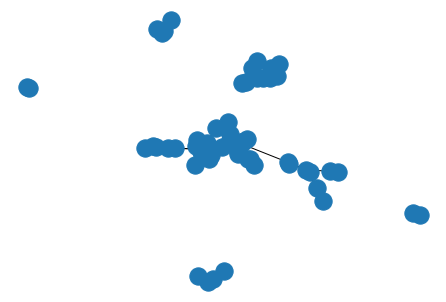

In [5]:
nx.draw(data[6])

In [6]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [7]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'ethnicity_1': {1, 2, 3, 4},
 'euthanasia_': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'political_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'age_1': {1, 2},
 'deathpen_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'gender_1': {1, 2},
 'hometown_1': {1, 2, 3}}

In [8]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [9]:
attributes

{1: array([[2., 3., 3., ..., 3., 2., 1.],
        [2., 2., 2., ..., 2., 2., 1.],
        [2., 3., 1., ..., 3., 1., 1.],
        ...,
        [4., 2., 1., ..., 1., 1., 1.],
        [1., 2., 1., ..., 1., 2., 3.],
        [1., 3., 3., ..., 3., 1., 1.]]),
 2: array([[1., 3., 1., ..., 1., 1., 3.],
        [1., 1., 1., ..., 1., 2., 1.],
        [1., 3., 3., ..., 1., 2., 1.],
        ...,
        [1., 1., 3., ..., 1., 2., 1.],
        [1., 3., 3., ..., 1., 1., 2.],
        [3., 2., 3., ..., 2., 2., 1.]]),
 3: array([[1., 3., 3., 1., 2., 3., 1., 1., 3., 3., 2., 2.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
        [1., 1., 1., 3., 2., 2., 2., 1., 1., 1., 2., 2.],
        [3., 3., 3., 3., 3., 3., 1., 3., 3., 1., 2., 1.],
        [1., 3., 3., 2., 1., 3., 2., 1., 3., 3., 1., 1.],
        [2., 3., 1., 1., 2., 3., 1., 1., 1., 3., 2., 1.],
        [1., 2., 3., 2., 1., 3., 1., 1., 3., 1., 1., 2.],
        [1., 2., 3., 1., 3., 3., 2., 1., 3., 3., 2., 2.],
        [1., 1., 3., 1., 1., 

## Linear Regression

In [10]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'euthanasia_', 'homosexual_', 'marijuana_', 'political_', 'gaymarriage_', 'deathpen_', 'premaritalsex_', 'abortion_'}
{1: array([[3., 3., 2., 1., 3., 3., 3., 3.],
       [2., 2., 3., 1., 1., 2., 2., 2.],
       [3., 1., 3., 3., 3., 3., 3., 3.],
       [1., 3., 2., 3., 3., 1., 3., 3.],
       [1., 3., 1., 2., 2., 2., 3., 3.],
       [3., 1., 1., 2., 1., 1., 1., 1.],
       [1., 2., 1., 1., 2., 2., 1., 1.],
       [2., 1., 3., 2., 2., 2., 1., 2.],
       [3., 3., 2., 2., 3., 1., 3., 3.],
       [1., 3., 3., 3., 3., 1., 3., 1.],
       [3., 1., 2., 2., 1., 1., 1., 1.],
       [1., 1., 1., 1., 2., 1., 1., 1.],
       [2., 3., 3., 1., 3., 1., 3., 1.],
       [1., 2., 3., 1., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 1.],
       [3., 2., 2., 1., 1., 1., 2., 1.],
       [2., 1., 2., 1., 1., 2., 3., 1.],
       [3., 1., 3., 1., 1., 3., 1., 1.],
       [3., 3., 3., 3., 3., 2., 2., 3.],
       [3., 1., 3., 1., 3., 1., 3., 1.],
       [3., 3., 3., 1., 3., 3., 3., 3.],
       [3., 3., 

In [11]:
df = pd.DataFrame(data=ord_attributes[1], columns=ord_list_of_attributes)
print(df)

    euthanasia_  homosexual_  marijuana_  political_  gaymarriage_  deathpen_  \
0           3.0          3.0         2.0         1.0           3.0        3.0   
1           2.0          2.0         3.0         1.0           1.0        2.0   
2           3.0          1.0         3.0         3.0           3.0        3.0   
3           1.0          3.0         2.0         3.0           3.0        1.0   
4           1.0          3.0         1.0         2.0           2.0        2.0   
..          ...          ...         ...         ...           ...        ...   
93          3.0          1.0         1.0         1.0           1.0        3.0   
94          3.0          3.0         3.0         3.0           1.0        3.0   
95          2.0          1.0         1.0         2.0           1.0        2.0   
96          2.0          1.0         1.0         1.0           2.0        1.0   
97          3.0          3.0         3.0         2.0           3.0        1.0   

    premaritalsex_  abortio

In [12]:
from sklearn.linear_model import LinearRegression

In [55]:
y_col = 1
y_name = sorted(list(ord_list_of_attributes))[y_col]
x_cols = [i for i in range(8) if not i == y_col]
x_names = [sorted(list(ord_list_of_attributes))[col] for col in x_cols]

In [56]:
x = df[x_names]
y = df[y_name]

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.15655002935871798


In [57]:
unexplained = np.zeros(8)
for y_col in range(8):
    y_name = sorted(list(ord_list_of_attributes))[y_col]
    x_cols = [i for i in range(8) if not i == y_col]
    x_names = [sorted(list(ord_list_of_attributes))[col] for col in x_cols]
    x = df[x_names]
    y = df[y_name]
    unexplained[y_col] = 1-LinearRegression().fit(x, y).score(x,y)

unexplained

array([0.50723633, 0.84344997, 0.79041536, 0.48665861, 0.32948947,
       0.77892277, 0.62736293, 0.51496461])

Above result shows how much variability of attributes is not described by other attributes. Can we use it as weights?

In [16]:
ord_list_of_attributes

{'abortion_',
 'deathpen_',
 'euthanasia_',
 'gaymarriage_',
 'homosexual_',
 'marijuana_',
 'political_',
 'premaritalsex_'}

In [17]:
a = np.ones(8)*2
b = np.ones(8)
np.dot(a,b)

16.0

In [18]:
def calc_distance(agent1, agent2, scale = 1, weights = 1):
    if not hasattr(weights, "__len__"):
        weights = np.ones(len(agent1)) * weights
    return np.sum(np.dot(np.abs(agent1-agent2), weights)) / np.sum(weights) / scale

def calc_distances(agents, scale = 1, weights = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale, weights)
            distances[j,i] = distances[i,j]
    return distances


In [1]:
dists = calc_distances(ord_attributes[1], 2)

plt.hist(dists.flatten(), density=True, bins = 8)

NameError: name 'calc_distances' is not defined

(array([0.40191587, 0.79758434, 1.35568513, 1.66597251, 1.54310704,
        1.4244065 , 1.24323199, 0.98084132, 0.49770929, 0.08954602]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

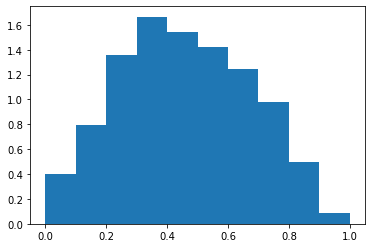

In [58]:
dists = calc_distances(ord_attributes[1], 2, unexplained)

plt.hist(dists.flatten(), density=True)

In [21]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0., -1.],
       [ 1.,  1.,  1., ..., -1., -1.,  0.]])

In [22]:
def calc_link_polarity2(agent1, agent2, th, attr_dif = 2, weights = 1):
    return calc_distance(agent1, agent2, attr_dif, weights) <= th

def calc_link_polarities2(agents, th, attr_dif = 2, weights = 1):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif, weights) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [60]:
polarities = calc_link_polarities2(ord_attributes[1], 0.5, 2, unexplained)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(polarities), balanced_triad_density(pol2)

(0.741899852724595, 0.7293682937092363)

In [24]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [25]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [61]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(ord_attributes[sem], 0.1, 2, unexplained)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.06666666666666667, 0.08373658741847256)

In [62]:
sem = 6
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(ord_attributes[sem], theta,2, unexplained)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

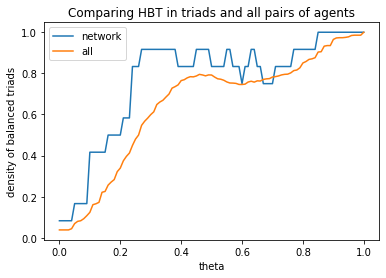

In [63]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

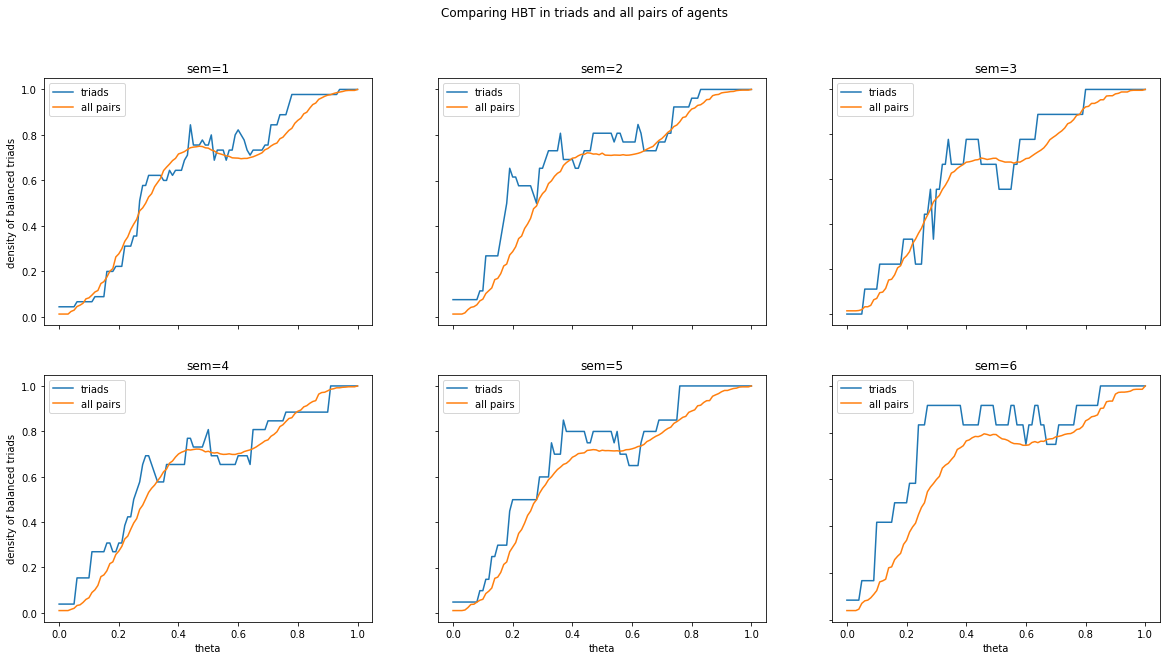

In [64]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and all pairs of agents")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        triads = get_triads(data[semm])
        
        all_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
            bals[i] = balanced_triad_density_network(polarities, triads)
            all_bals[i] = balanced_triad_density(polarities)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, all_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["triads", "all pairs"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0, 0.5, 'density of balanced triads')

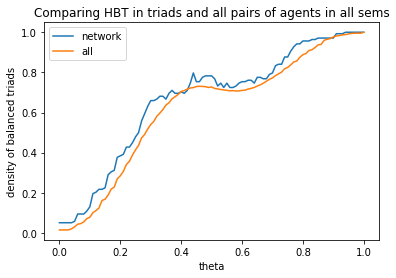

In [65]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]
net_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])

all_bals = np.zeros(len(thetas))
bals = np.zeros(len(thetas))

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    N = agents_len[semm-1]
            
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bals[i] = bals[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        all_bals[i] = all_bals[i] + balanced_triad_density(polarities) * N*(N-1)/2

bals = bals / triads_all_num
all_bals = all_bals / net_all_num

plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents in all sems")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [95]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta, 2, unexplained)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_all_agents_terms_together_thetas = thetas
test_all_agents_terms_together_bal_dens = bal_dens
test_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(9217.0,
 array([8888., 9129., 8389., 8602., 8590., 8669., 8566., 8516., 8318.,
        8921., 8769., 8425., 8541., 8609., 8524., 8448., 8963., 8461.,
        8619., 8729., 8597., 8223., 8759., 9065., 8152., 8536., 8614.,
        8682., 8850., 8463., 8294., 8855., 8811., 8126., 9128., 8483.,
        8758., 8634., 8023., 8561., 8251., 8531., 8170., 8592., 8310.,
        8178., 8607., 8843., 9269., 8570., 9105., 8152., 8595., 8346.,
        8265., 8437., 8753., 8889., 8817., 8998., 8748., 8559., 8543.,
        8100., 8500., 8827., 8733., 8750., 8541., 8850., 8609., 8648.,
        9116., 8023., 9252., 8552., 8262., 8790., 9016., 8591., 8787.,
        8488., 8840., 8491., 8321., 8328., 8118., 9055., 9030., 8839.,
        8181., 8537., 9290., 8740., 8970., 8035., 7948., 8702., 8653.,
        8657.]))

In [67]:
bal_dens_sum = 9217

In [70]:
# 1: 98,98 / M = 100
# 2: 97,97 / M = 100

In [97]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(97, 97)

In [98]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  5.,   5.,   5.,   5.,   8.,  17.,   9.,   9.,  13.,  17.,  13.,
         0.,   3.,   4.,  16.,  16.,   3.,   6.,   7.,   5.,   5.,  10.,
         6.,  11.,  16.,  15.,  13.,   9.,   6.,   4.,   4.,   5.,  10.,
        11.,  16.,  34.,  22.,  22.,  42.,  57.,  57.,  64.,  55.,  36.,
         8.,  40.,  40.,  25.,  18.,  20.,  19.,  25.,  48.,  37.,  47.,
        31.,  40.,  40.,  30.,  24.,  22.,  21.,  17.,  18.,  35.,  19.,
        16.,  25.,  36.,  18.,  22.,  13.,  16.,  20.,   5.,   9.,   1.,
         2.,   0.,   4.,   2.,   2.,   7.,   5.,  12.,  13.,  15.,  41.,
        53.,  60.,  72.,  39.,  45.,  52.,  38.,  46.,  57.,  69.,  69.,
        69., 100.])

In [99]:
pvals_T_res1 = np.array([  1.,   1.,   1.,   1.,   5.,   9.,   6.,   7.,  10.,  12.,  10.,
         0.,   0.,   1.,  16.,  12.,   2.,   6.,   5.,   3.,   7.,  12.,
         8.,  14.,  14.,  14.,  14.,   9.,   4.,   3.,   2.,   5.,   9.,
         7.,  12.,  29.,  19.,  19.,  34.,  46.,  60.,  67.,  60.,  36.,
        12.,  38.,  39.,  18.,  18.,  17.,  20.,  29.,  50.,  33.,  45.,
        26.,  46.,  45.,  37.,  22.,  16.,  18.,  19.,  20.,  33.,  15.,
        20.,  29.,  33.,  24.,  25.,  13.,  14.,  16.,   7.,   9.,   3.,
         1.,   0.,   0.,   1.,   1.,   3.,   2.,  10.,  14.,  16.,  38.,
        48.,  56.,  77.,  35.,  37.,  48.,  34.,  48.,  64.,  71.,  71.,
        71., 100.])
pvals_T_res2 = np.array([  5.,   5.,   5.,   5.,   8.,  17.,   9.,   9.,  13.,  17.,  13.,
         0.,   3.,   4.,  16.,  16.,   3.,   6.,   7.,   5.,   5.,  10.,
         6.,  11.,  16.,  15.,  13.,   9.,   6.,   4.,   4.,   5.,  10.,
        11.,  16.,  34.,  22.,  22.,  42.,  57.,  57.,  64.,  55.,  36.,
         8.,  40.,  40.,  25.,  18.,  20.,  19.,  25.,  48.,  37.,  47.,
        31.,  40.,  40.,  30.,  24.,  22.,  21.,  17.,  18.,  35.,  19.,
        16.,  25.,  36.,  18.,  22.,  13.,  16.,  20.,   5.,   9.,   1.,
         2.,   0.,   4.,   2.,   2.,   7.,   5.,  12.,  13.,  15.,  41.,
        53.,  60.,  72.,  39.,  45.,  52.,  38.,  46.,  57.,  69.,  69.,
        69., 100.])
# pvals_T_res3 = np.array([ 6.,  6.,  6.,  6.,  8., 11., 17.,  9., 15.,  8., 11., 19., 20.,
#        15., 15., 11.,  5., 17., 21., 11., 16., 25., 26., 13.,  5.,  0.,
#         0.,  1.,  1.,  3.,  2.,  5., 21., 30., 39., 24., 47., 39., 41.,
#        23., 24., 45., 59., 45., 59., 77., 86., 80., 84., 90., 64., 39.,
#        56., 62., 53., 37., 41., 65., 80., 64., 74., 79., 78., 69., 73.,
#        64., 46., 27., 35., 27.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
#         0.,  2.,  3.,  8., 11., 22., 29., 43., 39., 54., 27., 30., 37.,
#        43., 64., 64., 76., 60., 66., 67., 67., 67., 67.])
# pvals_T_res3 = np.

In [100]:
pvals_T_res1 + pvals_T_res2 

array([  6.,   6.,   6.,   6.,  13.,  26.,  15.,  16.,  23.,  29.,  23.,
         0.,   3.,   5.,  32.,  28.,   5.,  12.,  12.,   8.,  12.,  22.,
        14.,  25.,  30.,  29.,  27.,  18.,  10.,   7.,   6.,  10.,  19.,
        18.,  28.,  63.,  41.,  41.,  76., 103., 117., 131., 115.,  72.,
        20.,  78.,  79.,  43.,  36.,  37.,  39.,  54.,  98.,  70.,  92.,
        57.,  86.,  85.,  67.,  46.,  38.,  39.,  36.,  38.,  68.,  34.,
        36.,  54.,  69.,  42.,  47.,  26.,  30.,  36.,  12.,  18.,   4.,
         3.,   0.,   4.,   3.,   3.,  10.,   7.,  22.,  27.,  31.,  79.,
       101., 116., 149.,  74.,  82., 100.,  72.,  94., 121., 140., 140.,
       140., 200.])

Text(0, 0.5, 'density of balanced triads in all sems')

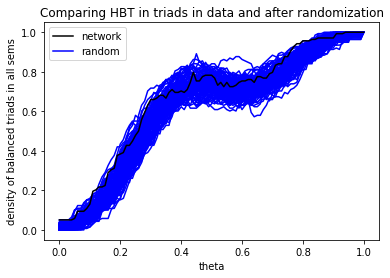

In [74]:
handles_rand = plt.plot(test_all_agents_terms_together_thetas, np.array(test_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Comparing HBT in triads in data and after randomization")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

Text(0, 0.5, 'density of balanced triads')

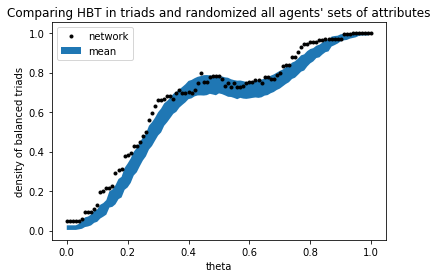

In [75]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'density of balanced triads')

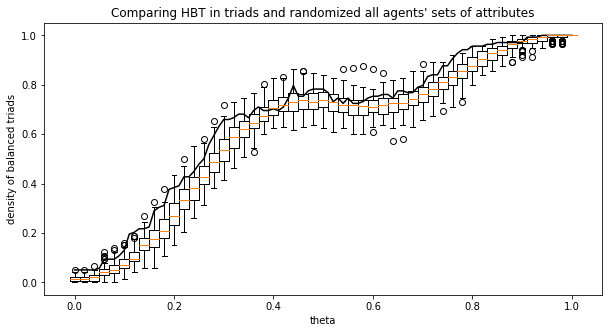

In [76]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

every = 2

axs.boxplot(np.array(test_all_agents_terms_together_bal_dens_rands[:,::every]),positions = thetas[::every], widths = 0.02, manage_ticks = False)
# axs.margins(x = -0.2)
# axs.xticks([1, 2, 3], ['mon', 'tue', 'wed'])

axs.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k')
axs.set_title("Comparing HBT in triads and randomized all agents' sets of attributes")
axs.set_xlabel("theta")
axs.set_ylabel("density of balanced triads")

In [92]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 100

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = calc_link_polarities2(attr_rands_M[j][semm], theta, 2, unexplained)
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_all_agents_terms_together_thetas2 = thetas
test_all_agents_terms_together_bal_dens2 = bal_dens
test_all_agents_terms_together_bal_dens_rands2 = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(6354.0,
 array([5797., 5915., 5697., 5967., 5645., 5879., 5930., 6033., 5867.,
        5918., 6204., 5720., 5756., 5898., 6216., 5656., 5615., 5593.,
        5703., 5863., 5683., 5882., 5943., 5823., 5708., 5650., 5820.,
        5628., 5714., 5730., 6285., 5680., 6096., 5602., 5962., 5584.,
        5909., 5583., 5932., 5744., 5606., 6057., 5734., 5699., 5940.,
        5959., 5740., 5726., 5689., 5961., 5825., 6202., 5739., 5799.,
        5717., 5585., 6394., 5920., 5806., 5443., 5803., 5850., 5907.,
        5749., 5896., 5821., 5770., 6000., 5858., 5946., 5644., 5717.,
        5844., 5789., 5910., 5981., 5694., 5933., 5909., 5519., 5716.,
        5954., 5937., 5701., 5624., 5734., 5755., 5746., 5713., 5735.,
        5571., 5898., 5666., 6187., 5814., 5982., 5764., 5696., 5538.,
        5679.]))

In [ ]:
bal_dens_sum = 6354.

In [93]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  4.,   4.,   4.,   4.,   6.,  12.,   3.,   3.,   5.,   7.,   3.,
         0.,   0.,   0.,   1.,   1.,   2.,   1.,   2.,   0.,   0.,   0.,
         1.,   2.,   2.,   3.,   2.,   6.,   3.,   0.,   0.,   0.,   2.,
         2.,   2.,  11.,   4.,  11.,  15.,  29.,  40.,  53.,  57.,  26.,
        14.,  32.,  35.,  14.,  15.,   8.,   9.,  23.,  23.,  23.,  43.,
        23.,  29.,  48.,  38.,  45.,  50.,  48.,  36.,  25.,  34.,  12.,
        18.,  34.,  46.,  43.,  44.,  36.,  32.,  41.,  27.,  31.,   8.,
        10.,  11.,  15.,   7.,  10.,  24.,  12.,  18.,  15.,  17.,  57.,
        66.,  67.,  78.,  21.,  24.,  30.,  33.,  39.,  51.,  53.,  53.,
        53., 100.])

In [90]:
pvals_T_res1 = np.array([  2.,   2.,   2.,   2.,   8.,  12.,   6.,   7.,   7.,   9.,   3.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   2.,   1.,   1.,   0.,   4.,   4.,   0.,   0.,   1.,   3.,
         3.,   4.,  15.,   1.,   9.,  18.,  34.,  30.,  41.,  51.,  20.,
        18.,  44.,  42.,  20.,  12.,   7.,   8.,  27.,  29.,  32.,  57.,
        30.,  35.,  50.,  42.,  47.,  53.,  43.,  34.,  28.,  31.,  18.,
        21.,  34.,  42.,  27.,  29.,  29.,  31.,  38.,  24.,  31.,   7.,
        10.,  12.,  18.,  16.,  18.,  28.,  15.,  19.,  19.,  19.,  47.,
        59.,  61.,  72.,  26.,  27.,  32.,  35.,  48.,  61.,  71.,  71.,
        71., 100.])

pvals_T_res2 = np.array([  5.,   5.,   5.,   5.,   6.,   9.,   2.,   2.,   5.,   8.,   3.,
         0.,   0.,   1.,   1.,   1.,   1.,   2.,   2.,   0.,   0.,   2.,
         4.,   4.,   1.,   2.,   1.,   8.,   9.,   5.,   2.,   2.,   5.,
         4.,   5.,  10.,   5.,  10.,  16.,  32.,  33.,  42.,  49.,  23.,
        15.,  32.,  35.,  12.,  11.,   8.,   9.,  22.,  20.,  26.,  50.,
        25.,  27.,  53.,  37.,  45.,  52.,  50.,  36.,  25.,  41.,  13.,
        16.,  33.,  42.,  35.,  28.,  26.,  35.,  38.,  28.,  33.,   5.,
         7.,  12.,  18.,  10.,  13.,  23.,  11.,  17.,  23.,  24.,  51.,
        61.,  62.,  84.,  36.,  37.,  45.,  47.,  54.,  62.,  70.,  70.,
        70., 100.])

pvals_T_res3 = np.

In [91]:
pvals_T_res1 + pvals_T_res2 + pvals_T_res3

array([  7.,   7.,   7.,   7.,  14.,  21.,   8.,   9.,  12.,  17.,   6.,
         0.,   0.,   1.,   1.,   1.,   1.,   2.,   3.,   0.,   0.,   2.,
         4.,   6.,   2.,   3.,   1.,  12.,  13.,   5.,   2.,   3.,   8.,
         7.,   9.,  25.,   6.,  19.,  34.,  66.,  63.,  83., 100.,  43.,
        33.,  76.,  77.,  32.,  23.,  15.,  17.,  49.,  49.,  58., 107.,
        55.,  62., 103.,  79.,  92., 105.,  93.,  70.,  53.,  72.,  31.,
        37.,  67.,  84.,  62.,  57.,  55.,  66.,  76.,  52.,  64.,  12.,
        17.,  24.,  36.,  26.,  31.,  51.,  26.,  36.,  42.,  43.,  98.,
       120., 123., 156.,  62.,  64.,  77.,  82., 102., 123., 141., 141.,
       141., 200.])

In [ ]:
# 1: 100,100 / M = 100
# 2: 100,100 / M = 100

In [94]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(99, 99)

Text(0, 0.5, 'density of balanced triads')

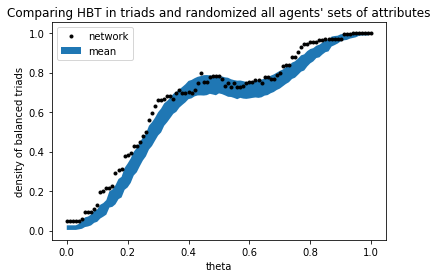

In [81]:
mean_vals = np.mean(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_all_agents_terms_together_thetas, test_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# Randomizing triads in the whole network

In [29]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem])
    
    return rand_ord_attributes

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [304]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, dcor_attributes[sem], 0.5, 2, 100)

In [305]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(12, -0.0868888888888889, 18)

In [346]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

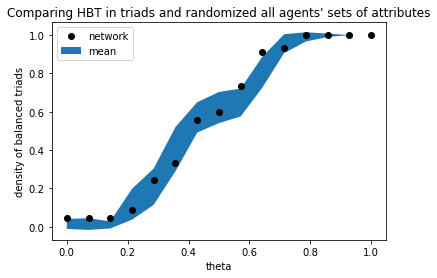

In [347]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [348]:
pvals, max_dif3

(array([ 8., 11.,  4., 53., 31., 73., 51., 53., 11.,  7., 70.,  0.,  0.,
         0.,  0.]),
 1.9498109791002052)

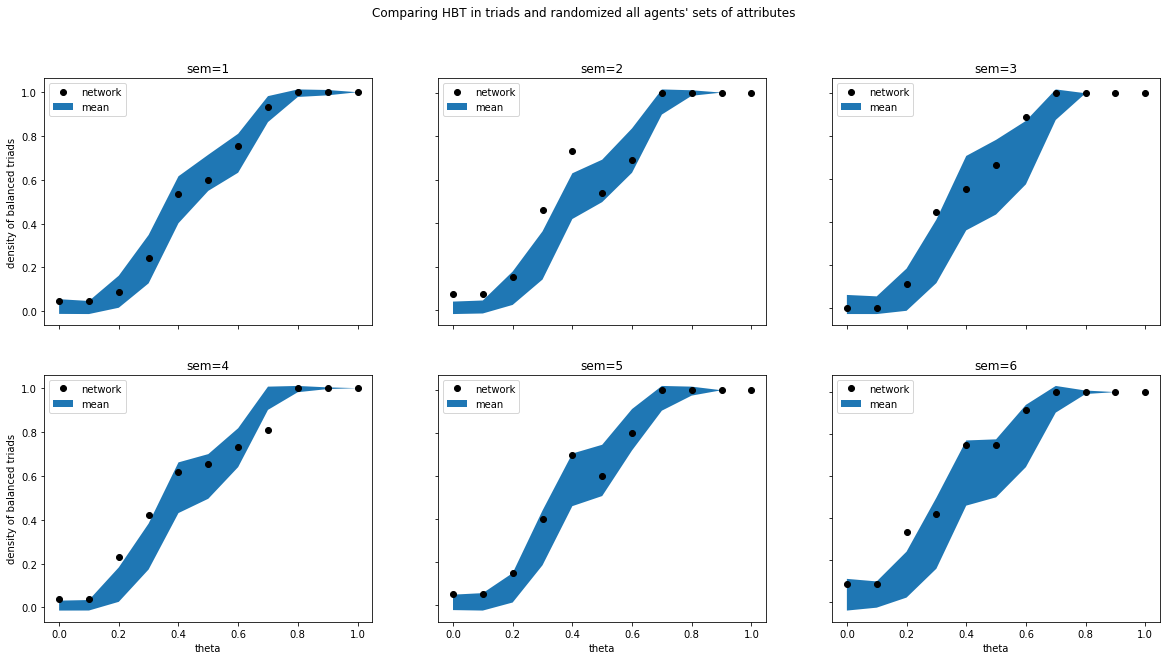

In [349]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [350]:
pvals

{1: array([17.,  9., 38., 41., 34., 55., 29., 44.,  0.,  0.,  0.]),
 2: array([ 2.,  2., 17.,  2.,  1., 69., 62.,  0.,  0.,  0.,  0.]),
 3: array([12.,  9., 19.,  6., 34., 27.,  4.,  0.,  0.,  0.,  0.]),
 4: array([ 5.,  6.,  5.,  6., 18., 27., 41., 97.,  0.,  0.,  0.]),
 5: array([ 4.,  9., 10., 23., 13., 55., 49.,  0.,  0.,  0.,  0.]),
 6: array([ 9.,  9.,  3., 22., 14., 14., 11.,  0.,  0.,  0.,  0.])}

# Randomizing attributes only inside triads

In [280]:
sem = 1
triads = get_triads(data[sem])

In [379]:
from itertools import chain
triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [354]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

Text(0, 0.5, 'density of balanced triads')

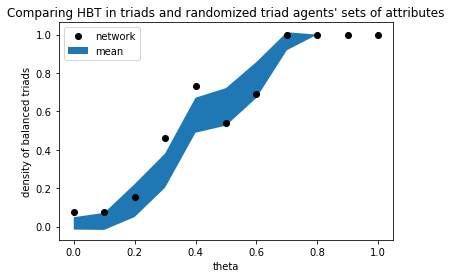

In [355]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [356]:
pvals_t, triad_agents

(array([ 5.,  9., 33.,  3.,  2., 74., 70.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  4,  5,  8,  9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 44, 45, 48, 51,
        58, 66, 76]))

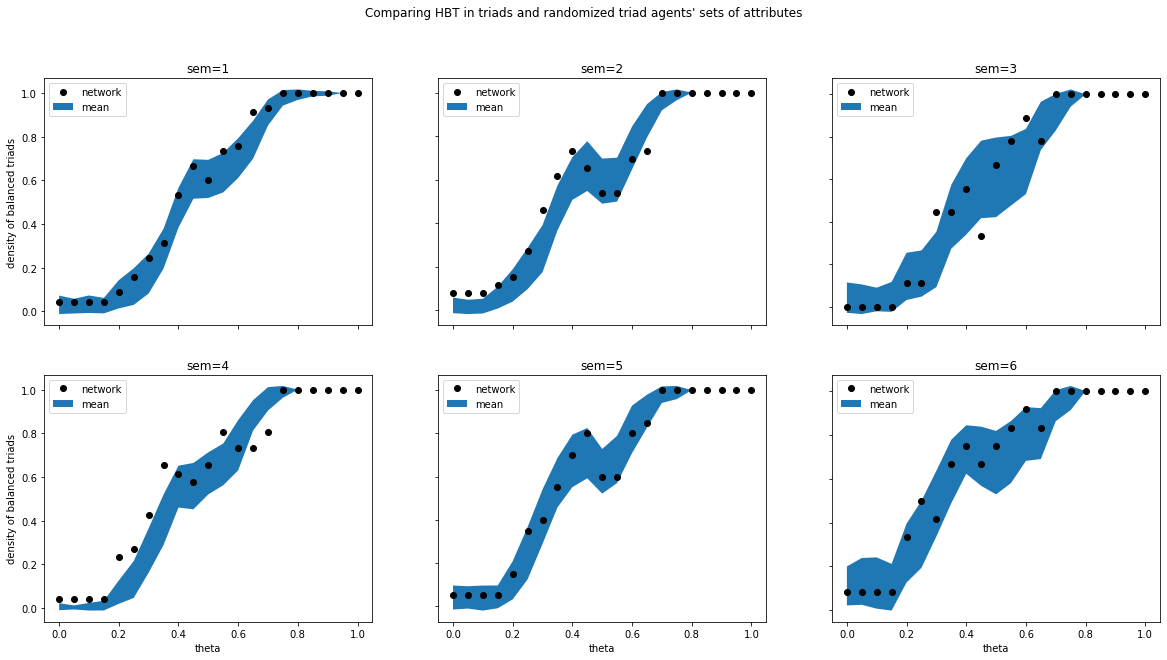

In [360]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [361]:
pvals_t

{1: array([22., 16., 23., 16., 29., 24., 19., 34., 23., 18., 49., 13., 22.,
         7., 34.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 5.,  3.,  5.,  6., 19., 14.,  2.,  4.,  5., 45., 66., 68., 62.,
        93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([30., 23., 28., 34., 39., 43.,  3., 31., 33., 88., 29., 11.,  5.,
        61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 3.,  1.,  3.,  3.,  0.,  5.,  4.,  1., 23., 40., 25.,  4., 51.,
        95., 96.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([21., 23., 20., 24., 28., 15., 45., 47., 32., 11., 47., 68., 53.,
        67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([44., 50., 42., 30., 22., 12., 57., 29., 25., 49., 23., 11.,  8.,
        31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [363]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

In [364]:
[len(np.unique(list(chain.from_iterable(get_triads(data[sem]))))) for sem in range(1,7)]

[43, 37, 22, 41, 30, 23]

In [365]:
[len(get_triads(data[sem])) for sem in range(1,7)]

[45, 26, 9, 26, 20, 12]

# Model E8

In [127]:
sem = 1
th = 0.4

polarities = calc_link_polarities2(ord_attributes[sem], th, 2, unexplained)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2

prob_balanced = np.power(rho,3) + 3*rho*np.power(1-rho,2)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), prob_balanced

(0.5555555555555556, 0.4964093376454762)

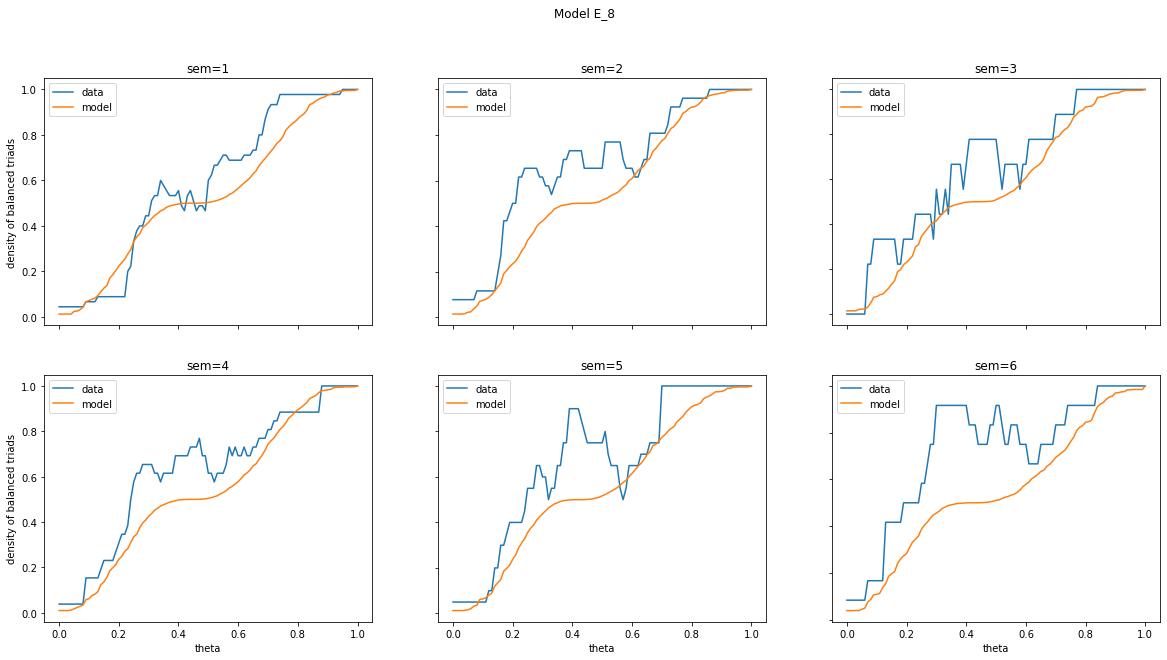

In [128]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
            
            N = polarities.shape[0]
            rho = np.sum(polarities == 1)/2 / N/(N-1)*2
            prob_bals[i] = np.power(rho,3) + 3*rho*np.power(1-rho,2)
            
            triads = get_triads(data[semm])
            bals[i] = balanced_triad_density_network(polarities, triads)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Analiza statystyczna powyższego

In [83]:
def distribute_random_polarities(N, rho):
    polarities = np.zeros([N,N], dtype = int)
    
    for i in range(0,N):
        for j in range(i+1, N):
            polarities[i,j] = 1 if np.random.random() < rho else -1
            polarities[j,i] = polarities[i,j]
    return polarities

def calc_pval_E8(triads, agents, th, attr_dif, M, weights = 1):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif, weights)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    N = polarities.shape[0]
    rho = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        polarities_rand = distribute_random_polarities(N, rho)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands >= bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks2(fun, data, th, attr_dif, M, weights = 1):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = fun(triads, agents, th, attr_dif, M, weights)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

In [130]:
sem = 1
th = 0.3

polarities = calc_link_polarities2(ord_attributes[sem], th, 2, unexplained)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.4444444444444444, 0.4444444444444444)

In [132]:
M = 100
calc_pval_E8(triads, ord_attributes[sem], th, 2, M, unexplained)

(array([0.4       , 0.44444444, 0.37777778, 0.44444444, 0.46666667,
        0.4       , 0.51111111, 0.44444444, 0.35555556, 0.46666667,
        0.4       , 0.35555556, 0.51111111, 0.48888889, 0.53333333,
        0.31111111, 0.46666667, 0.42222222, 0.2       , 0.37777778,
        0.44444444, 0.42222222, 0.37777778, 0.33333333, 0.44444444,
        0.37777778, 0.46666667, 0.28888889, 0.4       , 0.46666667,
        0.33333333, 0.46666667, 0.37777778, 0.44444444, 0.44444444,
        0.35555556, 0.33333333, 0.35555556, 0.33333333, 0.48888889,
        0.4       , 0.37777778, 0.35555556, 0.4       , 0.48888889,
        0.42222222, 0.44444444, 0.44444444, 0.53333333, 0.42222222,
        0.44444444, 0.44444444, 0.37777778, 0.31111111, 0.48888889,
        0.48888889, 0.42222222, 0.57777778, 0.35555556, 0.46666667,
        0.35555556, 0.35555556, 0.31111111, 0.46666667, 0.37777778,
        0.46666667, 0.4       , 0.53333333, 0.4       , 0.46666667,
        0.28888889, 0.46666667, 0.46666667, 0.2 

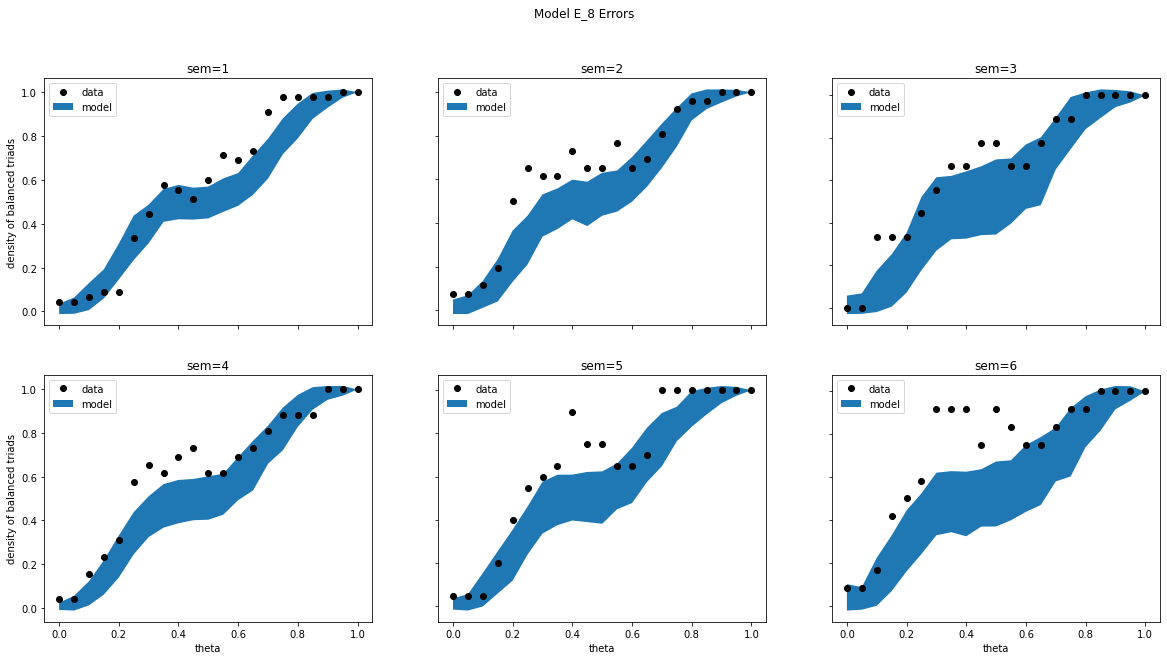

In [133]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
M = 100

pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8 Errors")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals_mean = np.zeros(len(thetas))
        prob_bals_std = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            triads = get_triads(data[semm])
            bal_dens_rands, bal_dens, pval = calc_pval_E8(triads, ord_attributes[semm], theta, 2, M, unexplained)
            
            prob_bals_mean[i] = np.mean(bal_dens_rands)
            prob_bals_std[i] = np.std(bal_dens_rands)
            pvals[semm][i] = pval
            
            bals[i] = bal_dens
        
        axs[a1, a2].set_title("sem=" + str(semm))
        # axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, prob_bals_mean-prob_bals_std, prob_bals_mean+prob_bals_std)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [134]:
calc_pval_E8(triads, ord_attributes[semm], 0.05, 2, M, unexplained)

(array([0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.08333333, 0.08333333, 0.        , 0.08333333, 0.        ,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.08333333, 0.08333333, 0.08333333, 0.        , 0.        ,
        0.16666667, 0.        , 0.        , 0.        , 0.25      ,
        0.25      , 0.        , 0.        , 0.08333333, 0.        ,
        0.        , 0.        , 0.08333333, 0.25      , 0.08333333,
        0.        , 0.08333333, 0.        , 0.08333333, 0.        ,
        0.08333333, 0.        , 0.        , 0.08333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08333333,
        0.08333333, 0.        , 0.16666667, 0.        , 0.16666667,
        0.        , 0.08333333, 0.08333333, 0.08333333, 0.        ,
        0.08333333, 0.25      , 0.25      , 0.        , 0.08333333,
        0.        , 0.        , 0.        , 0.08333333, 0.        ,
        0.25      , 0.08333333, 0.        , 0.  

In [135]:
sem = 6
th = 0.05

polarities = calc_link_polarities2(ord_attributes[sem], th, 2, unexplained)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.08333333333333333, 0.0)

In [136]:
pvals

{1: array([ 11.,  28.,  52.,  70.,  99.,  57.,  39.,  14.,  30.,  40.,  12.,
          1.,   7.,  10.,   3.,   2.,  11.,  42.,  65.,  86., 100.]),
 2: array([ 13.,  22.,  36.,  28.,   5.,   0.,   3.,   7.,   1.,   8.,  16.,
          3.,  33.,  48.,  41.,  23.,  47.,  75.,  71.,  92., 100.]),
 3: array([100., 100.,   4.,  14.,  29.,  39.,  33.,  20.,  18.,   8.,  11.,
         36.,  51.,  30.,  28.,  68.,  50.,  71.,  88.,  94., 100.]),
 4: array([ 12.,  33.,  11.,  18.,  24.,   2.,   1.,   9.,   1.,   0.,  16.,
         23.,  21.,  32.,  27.,  32.,  71.,  92.,  73.,  90., 100.]),
 5: array([ 18.,  24.,  71.,  38.,  12.,   6.,  18.,  13.,   0.,   2.,   3.,
         24.,  48.,  61.,   4.,   6.,  29.,  49.,  75.,  93., 100.]),
 6: array([ 34.,  32.,  38.,  10.,  15.,  17.,   0.,   0.,   0.,   6.,   3.,
          5.,  26.,  32.,  27.,  28.,  47.,  44.,  74.,  90., 100.])}

## Similar analysis but with taking all terms together

Text(0, 0.5, 'density of balanced triads')

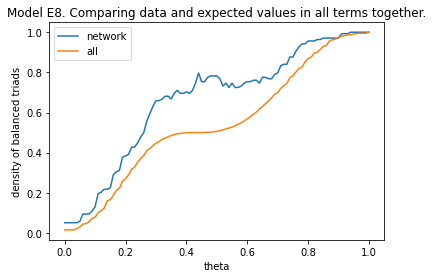

In [96]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]
net_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])

all_bals = np.zeros(len(thetas))
bals = np.zeros(len(thetas))

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    N = agents_len[semm-1]
            
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bals[i] = bals[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        rho = np.sum(polarities == 1)/2 / N/(N-1)*2
        all_bals[i] = all_bals[i] + (np.power(rho,3) + 3*rho*np.power(1-rho,2) ) * N*(N-1)/2

bals = bals / triads_all_num
all_bals = all_bals / net_all_num

plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Model E8. Comparing data and expected values in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [138]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
# attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        N = polarities.shape[0]
        rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas = thetas
test_E8_all_agents_terms_together_bal_dens = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(8815.0,
 array([7606., 7580., 7597., 7648., 7615., 7419., 7560., 7595., 7584.,
        7452., 7613., 7596., 7582., 7544., 7621., 7627., 7542., 7565.,
        7566., 7489., 7572., 7603., 7569., 7592., 7571., 7518., 7559.,
        7512., 7556., 7617., 7617., 7673., 7639., 7540., 7600., 7495.,
        7641., 7563., 7594., 7557., 7582., 7586., 7535., 7554., 7469.,
        7692., 7448., 7598., 7567., 7541., 7652., 7587., 7538., 7572.,
        7493., 7630., 7626., 7532., 7634., 7631., 7556., 7577., 7538.,
        7518., 7483., 7527., 7589., 7612., 7621., 7563., 7594., 7567.,
        7631., 7557., 7601., 7633., 7603., 7565., 7557., 7680., 7548.,
        7535., 7499., 7659., 7609., 7681., 7575., 7575., 7543., 7532.,
        7548., 7574., 7617., 7625., 7561., 7565., 7615., 7561., 7574.,
        7459., 7598., 7601., 7576., 7591., 7569., 7544., 7611., 7612.,
        7580., 7638., 7553., 7510., 7613., 7554., 7684., 7575., 7564.,
        7631., 7533., 7615., 7584., 7506., 7568., 7528., 7570., 7521

In [139]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

Text(0, 0.5, 'density of balanced triads')

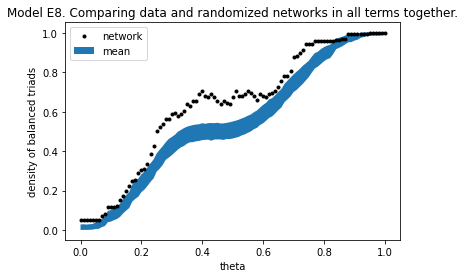

In [140]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'density of balanced triads in all sems')

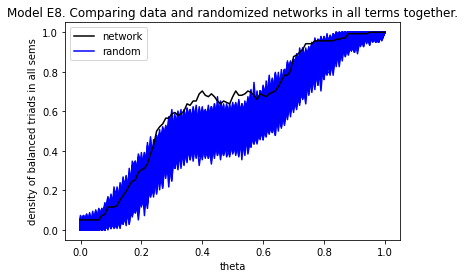

In [141]:
handles_rand = plt.plot(test_E8_all_agents_terms_together_thetas, np.array(test_E8_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [142]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] > bal_dens[i])

pvals_T

array([ 16.,  15.,  14.,  18.,  20.,  51.,  93.,  43.,  62.,  51.,  58.,
       117., 117.,  57.,  68.,  62.,  33.,  69., 130.,  40.,  65.,  79.,
        73.,  19.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
         2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   2.,   7.,   5.,  18.,  45.,  46.,  47.,  69.,  53.,
        20.,  12.,  46.,  45.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
         3.,   4.,   7.,  15.,  27.,  45.,  94., 202., 258., 238., 374.,
        74.,  79., 144., 168., 340., 419., 573.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [143]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  30.,   40.,   27.,   36.,   34.,   95.,  128.,   70.,   94.,
         78.,   91.,  157.,  163.,   78.,   87.,   86.,   51.,   89.,
        162.,   58.,   85.,  102.,  100.,   25.,    8.,    0.,    0.,
          0.,    0.,    1.,    1.,    0.,    2.,    3.,    2.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          1.,    2.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    2.,    2.,   13.,    6.,   25.,   66.,   69.,
         69.,   94.,   80.,   36.,   26.,   67.,   68.,    0.,    2.,
          1.,    3.,    0.,    0.,    4.,    7.,    6.,   15.,   36.,
         50.,   75.,  151.,  298.,  398.,  370.,  520.,  197.,  205.,
        345.,  377.,  554.,  666.,  764.,  549.,  600.,  616.,  623.,
        644., 1000.])

In [67]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 50]

[(0.0, 39.0),
 (0.01, 28.0),
 (0.02, 35.0),
 (0.03, 33.0),
 (0.04, 23.0),
 (0.05, 30.0),
 (0.06, 31.0),
 (0.19, 3.0),
 (0.2, 5.0),
 (0.21, 3.0),
 (0.22, 1.0),
 (0.23, 2.0),
 (0.24, 2.0),
 (0.25, 0.0),
 (0.26, 0.0),
 (0.27, 1.0),
 (0.28, 0.0),
 (0.29, 0.0),
 (0.3, 0.0),
 (0.31, 0.0),
 (0.32, 0.0),
 (0.33, 0.0),
 (0.34, 0.0),
 (0.35000000000000003, 0.0),
 (0.36, 0.0),
 (0.37, 0.0),
 (0.38, 0.0),
 (0.39, 0.0),
 (0.4, 0.0),
 (0.41000000000000003, 0.0),
 (0.42, 0.0),
 (0.43, 0.0),
 (0.44, 0.0),
 (0.45, 0.0),
 (0.46, 0.0),
 (0.47000000000000003, 0.0),
 (0.48, 0.0),
 (0.49, 0.0),
 (0.5, 0.0),
 (0.51, 0.0),
 (0.52, 0.0),
 (0.53, 0.0),
 (0.54, 0.0),
 (0.55, 0.0),
 (0.56, 0.0),
 (0.5700000000000001, 0.0),
 (0.58, 0.0),
 (0.59, 0.0),
 (0.6, 0.0),
 (0.61, 0.0),
 (0.62, 0.0),
 (0.63, 2.0),
 (0.64, 2.0),
 (0.65, 2.0),
 (0.66, 3.0),
 (0.67, 3.0),
 (0.68, 1.0),
 (0.6900000000000001, 9.0),
 (0.7000000000000001, 9.0),
 (0.71, 8.0),
 (0.72, 3.0),
 (0.73, 9.0),
 (0.74, 5.0),
 (0.75, 2.0),
 (0.76, 2.0),
 (

In [49]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        
        N = polarities.shape[0]
        rhos[semm-1, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

In [50]:
rhos

array([[0.00420787, 0.00420787, 0.00420787, 0.00420787, 0.00420787,
        0.00820534, 0.00862613, 0.01073007, 0.01451715, 0.02314328,
        0.02545761, 0.02714075, 0.02924469, 0.03345256, 0.04018515,
        0.04628656, 0.05070482, 0.06501157, 0.07174416, 0.0801599 ,
        0.0896276 , 0.09699137, 0.10540711, 0.11782032, 0.12918157,
        0.15169367, 0.16621081, 0.17673049, 0.19987376, 0.21102462,
        0.22364822, 0.24321481, 0.26067747, 0.27624658, 0.2949716 ,
        0.30885756, 0.33494635, 0.35346097, 0.36734694, 0.38354723,
        0.40353461, 0.42499474, 0.4424574 , 0.4584473 , 0.48243215,
        0.50368189, 0.519251  , 0.53734483, 0.55943615, 0.57668841,
        0.59520303, 0.609089  , 0.62949716, 0.64464549, 0.66189775,
        0.67662529, 0.69198401, 0.71134021, 0.72249106, 0.73848096,
        0.75383968, 0.76835683, 0.78119083, 0.79192089, 0.80349253,
        0.81800968, 0.82873974, 0.84472964, 0.85651168, 0.86576899,
        0.87628866, 0.88512518, 0.89354092, 0.90

In [84]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
# attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2, unexplained)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        N = polarities.shape[0]
        rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas = thetas
test_E8_all_agents_terms_together_bal_dens = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(6354.0,
 array([5111., 5105., 5095., 5074., 5146., 5145., 5104., 5103., 5095.,
        5176., 5139., 5145., 5094., 5129., 5120., 5068., 5188., 5097.,
        5043., 5201., 5122., 5222., 5038., 5108., 5093., 5151., 5118.,
        5114., 5112., 5081., 5022., 5114., 5095., 5132., 5137., 5048.,
        5107., 5089., 5114., 5058., 5164., 5025., 5159., 5106., 5106.,
        5145., 5089., 5168., 5146., 5028., 5115., 5052., 5118., 5073.,
        5151., 5177., 5095., 5118., 5144., 5147., 5104., 5139., 5104.,
        5119., 5035., 5186., 5166., 5049., 5125., 5185., 5073., 5056.,
        5121., 5115., 5128., 5153., 5059., 5150., 5126., 5081., 5116.,
        5111., 5051., 5132., 5071., 5119., 5029., 5178., 5052., 5098.,
        5160., 5156., 5106., 5101., 5125., 5122., 5083., 5166., 5120.,
        5085., 5139., 5146., 5052., 5165., 5061., 5110., 5160., 5110.,
        5149., 5108., 5117., 5085., 5126., 5051., 5119., 5118., 5106.,
        5161., 5089., 5129., 5138., 5053., 5191., 5189., 5128., 5062

Text(0, 0.5, 'density of balanced triads in all sems')

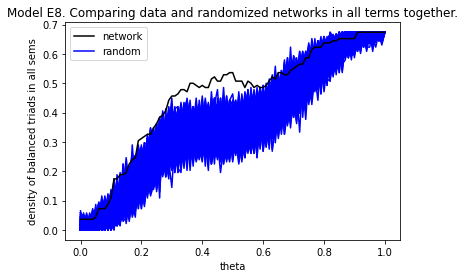

In [85]:
handles_rand = plt.plot(test_E8_all_agents_terms_together_thetas, np.array(test_E8_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

In [86]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  38.,   42.,   51.,   65.,   79.,  120.,   32.,   29.,   81.,
         59.,   23.,    1.,    2.,    1.,   13.,    7.,    0.,    9.,
          7.,    0.,    0.,    0.,    1.,    7.,    2.,    3.,    2.,
          3.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    4.,    3.,    5.,    4.,
          5.,    8.,    1.,    3.,   19.,   34.,   35.,   30.,   37.,
         56.,   60.,   48.,   72.,   12.,   18.,   25.,   86.,   30.,
         54.,  149.,   94.,  161.,  164.,  185.,  454.,  554.,  576.,
        767.,  294.,  344.,  402.,  421.,  553.,  665.,  702.,  708.,
        695., 1000.])